In [1]:
import os
if  not 'juxtorpus' in os.listdir():
    os.chdir('../../')
assert 'juxtorpus' in os.listdir(), f"Working directory should be at juxtorpus. But at {os.getcwd()}"
f"Working directory: {os.getcwd()}"

'Working directory: /Users/hcha9747/workspace/juxtorpus'

In [26]:
app = App()

In [27]:
## from juxtorpus.corpus.app import App
app.corpus_builder()

In [28]:
app.corpus_registry()

GridBox(children=(VBox(children=(HBox(children=(Label(value='Corpus ID', layout=Layout(display='flex', justify…

In [21]:
corpus = app._selected_corpus

In [5]:
corpus.meta

{'created_at': <SeriesMeta [Id: created_at]>,
 'favorite_count': <SeriesMeta [Id: favorite_count]>,
 'from_user_id': <SeriesMeta [Id: from_user_id]>,
 'from_user_name': <SeriesMeta [Id: from_user_name]>,
 'id': <SeriesMeta [Id: id]>,
 'in_reply_to_status_id': <SeriesMeta [Id: in_reply_to_status_id]>,
 'lang': <SeriesMeta [Id: lang]>,
 'location': <SeriesMeta [Id: location]>,
 'possibly_sensitive': <SeriesMeta [Id: possibly_sensitive]>,
 'quoted_status_id': <SeriesMeta [Id: quoted_status_id]>,
 'retweet_count': <SeriesMeta [Id: retweet_count]>,
 'retweet_id': <SeriesMeta [Id: retweet_id]>,
 'source': <SeriesMeta [Id: source]>,
 'to_user_id': <SeriesMeta [Id: to_user_id]>,
 'to_user_name': <SeriesMeta [Id: to_user_name]>,
 'tweet_type': <SeriesMeta [Id: tweet_type]>}

In [8]:
import pandas as pd
groups = list(corpus.slicer.group_by('created_at', pd.Grouper(freq='1m')))

In [9]:
groups

[(Timestamp('2021-03-31 00:00:00', freq='M'),
  <juxtorpus.corpus.corpus.Corpus at 0x2affaee50>),
 (Timestamp('2021-04-30 00:00:00', freq='M'),
  <juxtorpus.corpus.corpus.Corpus at 0x2b009c460>),
 (Timestamp('2021-05-31 00:00:00', freq='M'),
  <juxtorpus.corpus.corpus.Corpus at 0x2b00c2b20>),
 (Timestamp('2021-06-30 00:00:00', freq='M'),
  <juxtorpus.corpus.corpus.Corpus at 0x2b0081f40>),
 (Timestamp('2021-07-31 00:00:00', freq='M'),
  <juxtorpus.corpus.corpus.Corpus at 0x2b012ec10>),
 (Timestamp('2021-08-31 00:00:00', freq='M'),
  <juxtorpus.corpus.corpus.Corpus at 0x2b0200040>),
 (Timestamp('2021-09-30 00:00:00', freq='M'),
  <juxtorpus.corpus.corpus.Corpus at 0x2b0220a60>),
 (Timestamp('2021-10-31 00:00:00', freq='M'),
  <juxtorpus.corpus.corpus.Corpus at 0x2b025fe80>),
 (Timestamp('2021-11-30 00:00:00', freq='M'),
  <juxtorpus.corpus.corpus.Corpus at 0x2b032db80>),
 (Timestamp('2021-12-31 00:00:00', freq='M'),
  <juxtorpus.corpus.corpus.Corpus at 0x2b040b0a0>),
 (Timestamp('2022-01

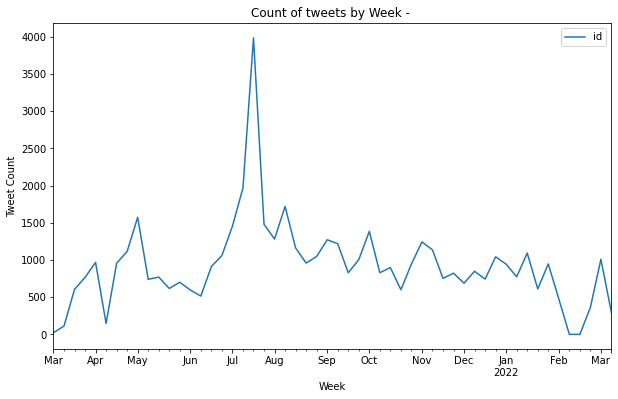

In [17]:
import matplotlib.pyplot as plt
def plot_weekly(df, title=''):
    df = df[['created_at', 'id']]
    df.set_index('created_at', inplace=True)
    weekly_counts = df.resample('W').count()
    weekly_counts.plot(kind='line', y='id', figsize=(10, 6))
    plt.title('Count of tweets by Week - {}'.format(title))
    plt.xlabel('Week')
    plt.ylabel('Tweet Count')
    plt.show()
    
plot_weekly(pd.concat([corpus.meta['created_at'].series(), corpus.meta['id'].series()], axis=1))

In [19]:
# corpus.viz.timeline(freq='1m')
# meta

"""
todo:
wordcloud(corpus)
timeline(corpus)

corpus.viz.wordcloud()
corpus.viz.timeline()
"""


import pandas as pd
import plotly.graph_objects as go

traces = list()
time_period_groups = groups
trace = go.Scatter(x=[g for g, _ in time_period_groups], 
                   y=[len(c) for _, c in time_period_groups],
                  name=f"Freq")
# traces
fig = go.Figure([trace])
fig.update_xaxes(
    dtick="M1"
)
fig.update_layout(
    title=f"Number of tweets by month",
)
fig.show()

In [31]:
app.corpus_slicer()

In [30]:
app.corpus_registry()

GridBox(children=(VBox(children=(HBox(children=(Label(value='Corpus ID', layout=Layout(display='flex', justify…